In [4]:
import numpy as np
from numpy import pi as pi
import scipy.signal as sg
import scipy.io 
import matplotlib.pyplot as plt
# import cmocean
from mpl_toolkits.axes_grid1 import ImageGrid
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark
from src.utilities.utilstf import get_spectrogram
from src.utilities.utils import find_zeros_of_spectrogram

plt.rcParams['xtick.labelsize'] = 6.0
plt.rcParams['ytick.labelsize'] = 6.0
plt.rcParams['axes.labelsize'] =  7.0
plt.rc('axes', axisbelow=True)

In [5]:
def a_chirp(N,):
    """Generates an cos chirp.
    """

    tmin = int(N**0.5)
    tmax = N-tmin      
    Nsub = tmax-tmin
    tsub = np.arange(Nsub)/Nsub

    instf =  0.07*np.sin(2*pi*1.2*tsub - pi/5) + 0.1 + 0.25*tsub 
    phase = np.cumsum(instf)
    # x = np.exp(1j*2*pi*phase)
    x = np.cos(2*pi*phase)
    signal = np.zeros((N,))
    signal[tmin:tmax] = x*sg.windows.tukey(Nsub,0.5)
    
    return signal

In [6]:
# rng
np.random.seed(1) 

# signal parameters
SNRin = 10
N = 2**8
Nsub=None
sbank = SignalBank(N=N,)
# s = sbank.signal_linear_chirp()
s = sbank.signal_mc_double_cos_chirp()

noise = np.random.randn(N,)
x, scaled_noise = Benchmark.sigmerge(s,noise,SNRin, return_noise=True)

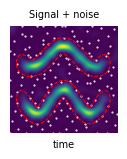

In [7]:
fig, ax = plt.subplots(1,1,figsize=(1.4,1.4))
S, _ = get_spectrogram(x)
Sn, _ = get_spectrogram(s)


ceros = find_zeros_of_spectrogram(S)
ax.imshow(S, origin='lower')
# axs.imshow(np.log(S), origin='lower', cmap=cmocean.cm.deep)
ax.plot(ceros[:,1],ceros[:,0],'wo', markersize=0.5)

# Remove ticks labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                labelbottom=False, right=False, left=False, labelleft=False)

ax.set_title("Signal + noise", fontsize=7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.contour(Sn,[np.var(scaled_noise)], colors='r', linestyles='dashed', linewidths=0.75)


# Label the axis.
# ax.set_ylabel('frequency', fontsize=7)
ax.set_xlabel('time', fontsize=7)
   
fig.savefig('figures/spect_mixture.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)



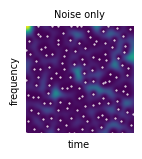

In [8]:
fig, ax = plt.subplots(1,1,figsize=(1.4,1.4))
S, _ = get_spectrogram(noise)
ceros = find_zeros_of_spectrogram(S)
ax.imshow(S, origin='lower')
# axs.imshow(np.log(S), origin='lower', cmap=cmocean.cm.deep)
ax.plot(ceros[:,1],ceros[:,0],'wo', markersize=0.5)

# Remove ticks labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                labelbottom=False, right=False, left=False, labelleft=False)

ax.set_title("Noise only", fontsize=7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Label the axis.
ax.set_ylabel('frequency', fontsize=7)
ax.set_xlabel('time', fontsize=7)

fig.savefig('figures/spect_noise_only.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)

# plt.tight_layout()
plt.show()